## Import Tensorflow and other libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import StandardScaler, Normalizer, PowerTransformer
from sklearn.model_selection import train_test_split
from tensorflow.keras import losses

import matplotlib.pyplot as plt

# Print tensorflow version. This code has been tested with 2.3.0
print(f'Tensorflow Version: {tf.__version__}')
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Tensorflow Version: 2.3.0


## Parameters

In [2]:
nrx = 16    # num of receiver antennas
nsnr = 21   # num of snr points
nx = 10000  # num of tx samples

## Read data from the Files

In [3]:
df = pd.read_csv(r'../../datasets/new/dataset.csv')

# Random tx data
x = np.char.replace(np.array(df['x'],dtype=str),'i','j').astype(np.complex)

# Channel w
w = np.array([np.char.replace(np.array(df['w_'+str(i+1)],dtype=str),'i','j').astype(np.complex)
              for i in range(nrx)], dtype=complex)

y_ant = np.array([np.char.replace(np.array(df['yant_'+str(isnr*nrx+irx+1)],dtype=str),'i','j').astype(np.complex)
              for isnr in range(nsnr) for irx in range(nrx) ], dtype=complex).T.reshape(nx,nsnr,nrx)

y_rffe = np.array([np.char.replace(np.array(df['yrffe_'+str(isnr*nrx+irx+1)],dtype=str),'i','j').astype(np.complex)
                    for isnr in range(nsnr) for irx in range(nrx)]).T.reshape(nx,nsnr,nrx)

pwr_in = np.array([np.char.replace(np.array(df['pwrIn_'+str(isnr*nrx+irx+1)],dtype=str),'i','j').astype(np.float)
                    for isnr in range(nsnr) for irx in range(nrx)]).T.reshape(nx,nsnr,nrx)
pwr_out = np.array([np.char.replace(np.array(df['pwrOut_'+str(isnr*nrx+irx+1)],dtype=str),'i','j').astype(np.float)
                    for isnr in range(nsnr) for irx in range(nrx)]).T.reshape(nx,nsnr,nrx)
print(f'y_ant shape: {y_ant.shape}')
print(f'y_rffe shape: {y_rffe.shape}')


y_ant shape: (10000, 21, 16)
y_rffe shape: (10000, 21, 16)


## Define some helper functions

In [4]:
def snr(Phi):
    xh = sum(Phi.T*np.conj(w),0)/np.sum(np.abs(w)**2,0)
    a = np.mean(np.conj(xh)*x)/np.mean(np.abs(x)**2)
    d_var = np.mean(np.abs(xh - a*x)**2)
    snr_out = 10*np.log10(np.abs(a)**2/d_var)
    return snr_out


20


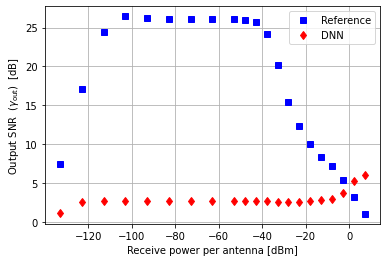

19


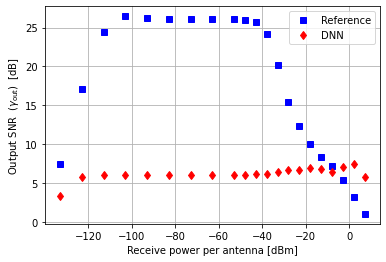

18


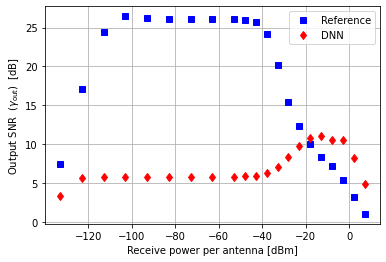

17


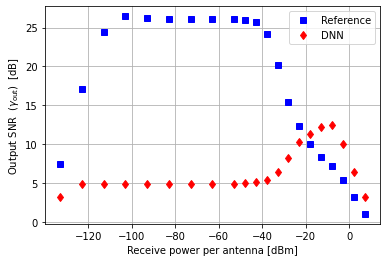

16


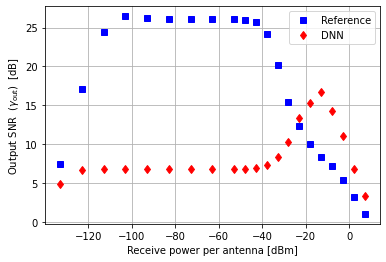

15


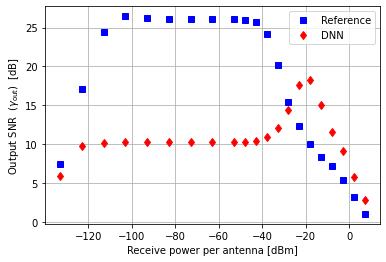

14


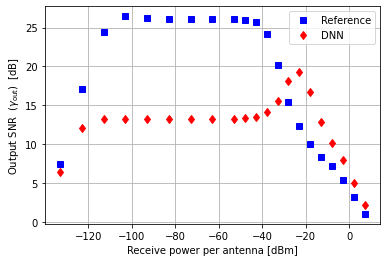

13


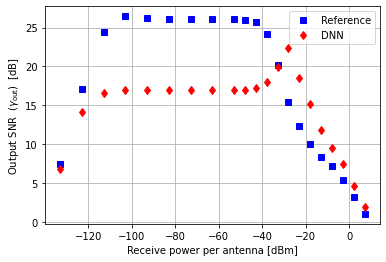

12


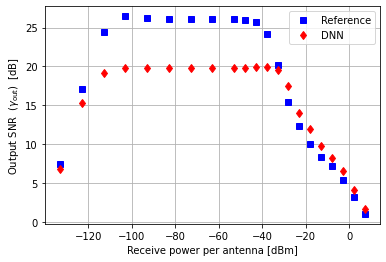

11


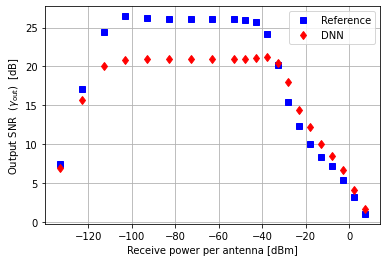

10


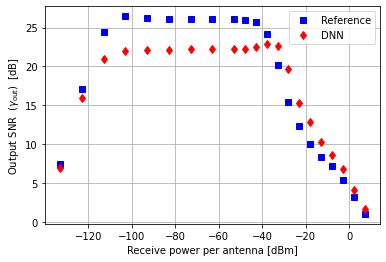

9


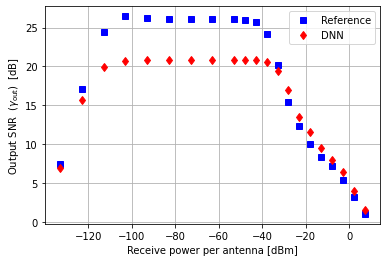

8


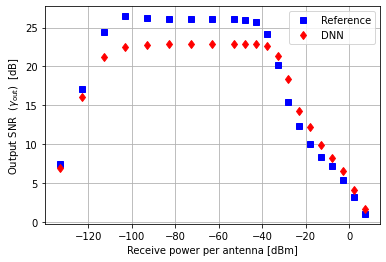

7


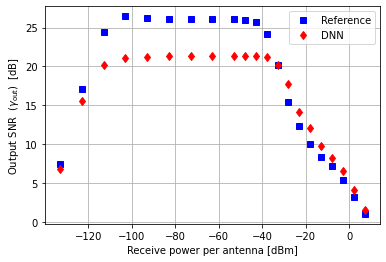

6


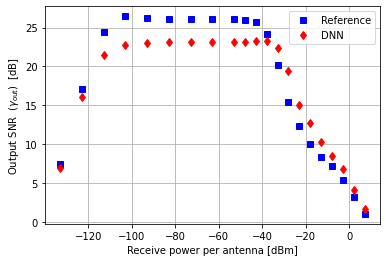

5


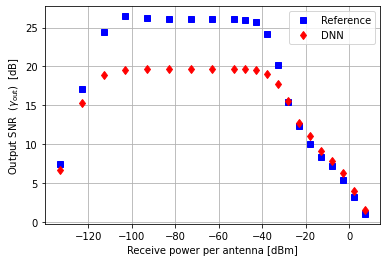

4


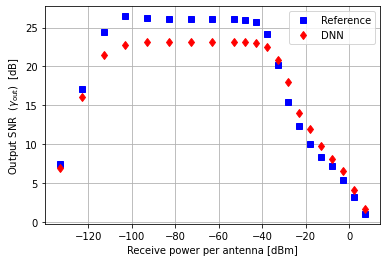

3


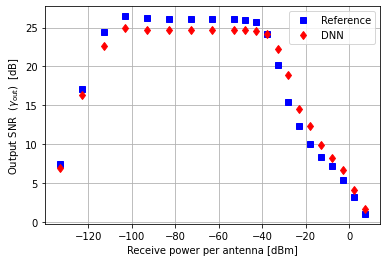

2


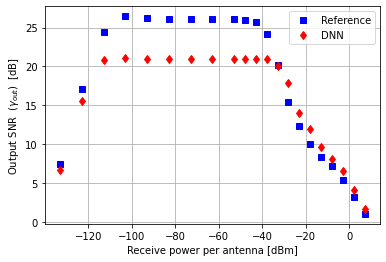

1


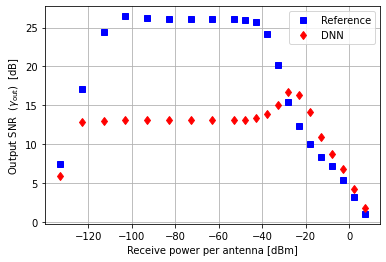

20


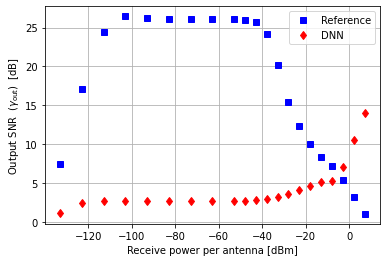

19


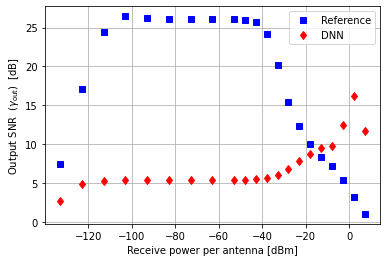

18


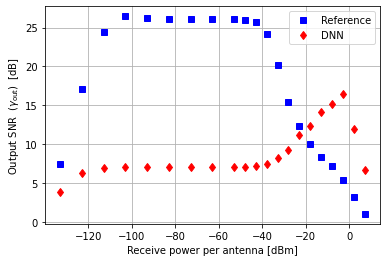

17


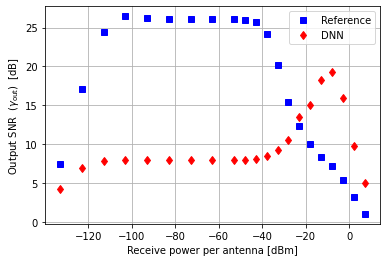

16


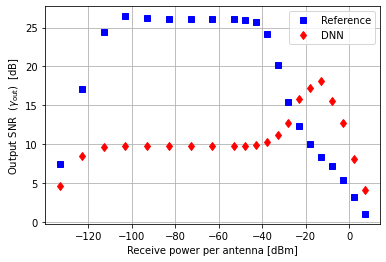

15


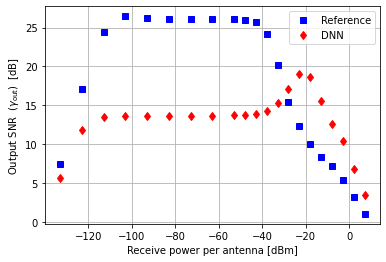

14


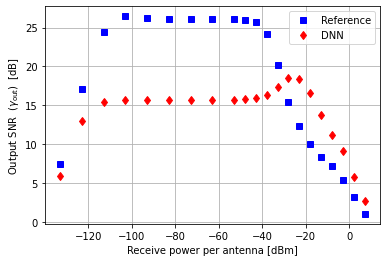

13


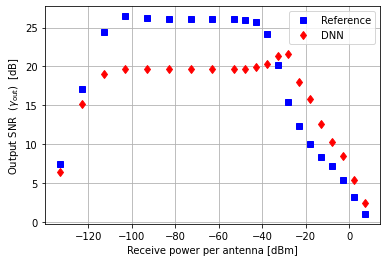

12


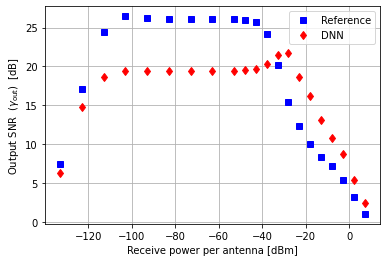

11


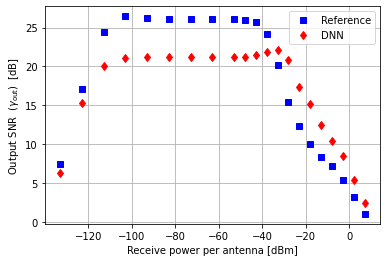

10


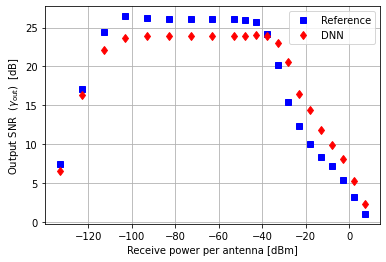

9


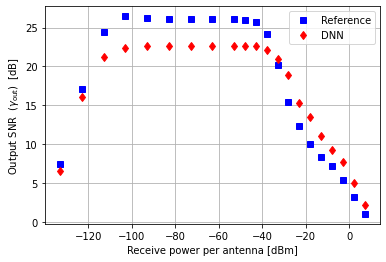

8


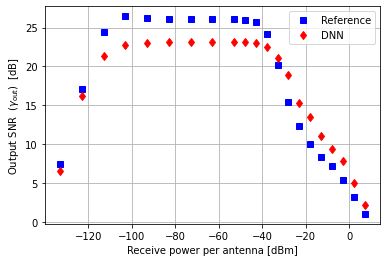

7


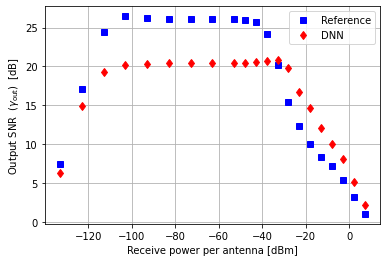

6


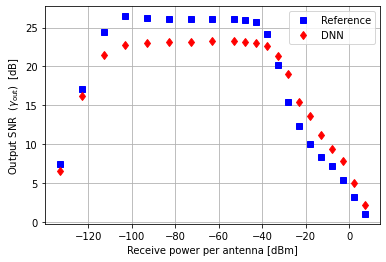

5


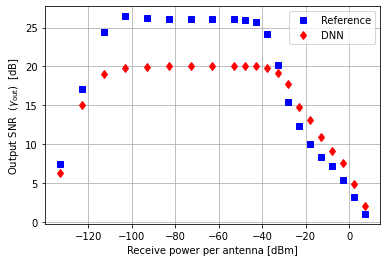

4


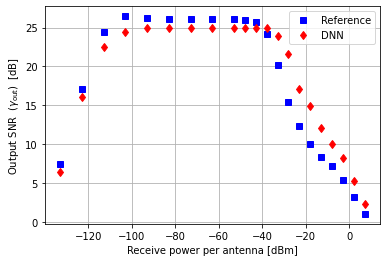

3


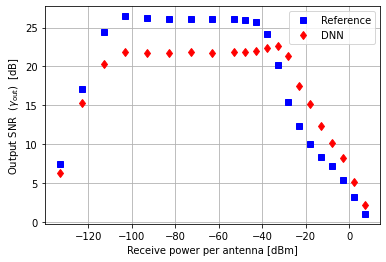

2


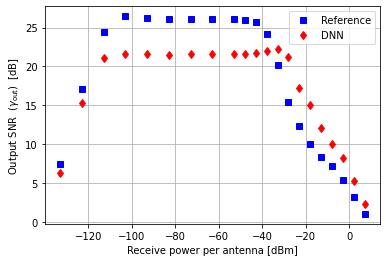

1


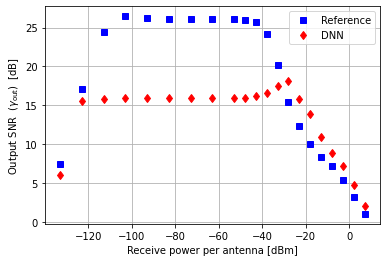

20


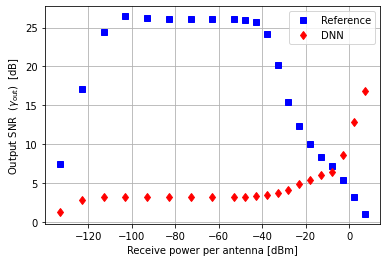

19


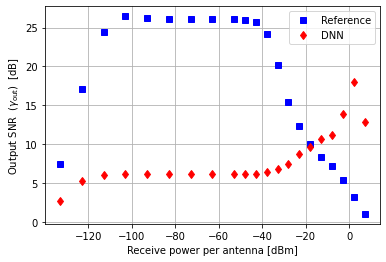

18


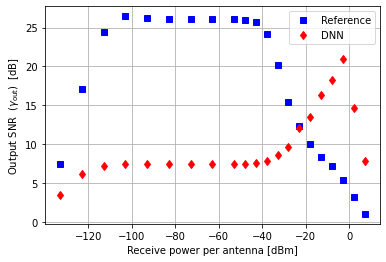

17


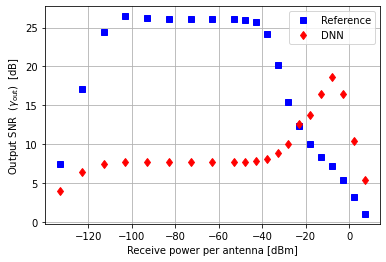

16


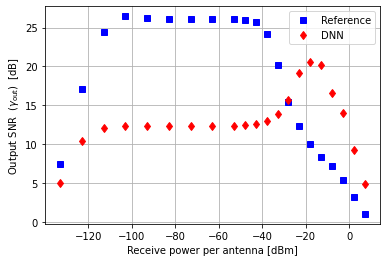

15


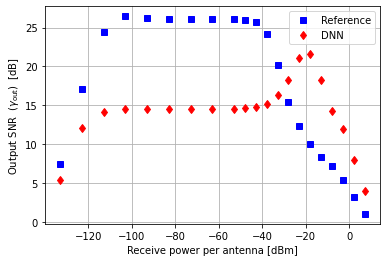

14


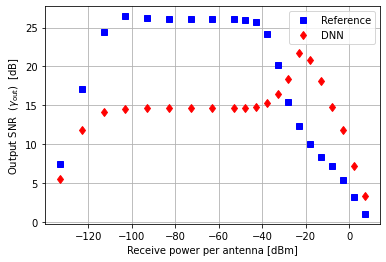

13


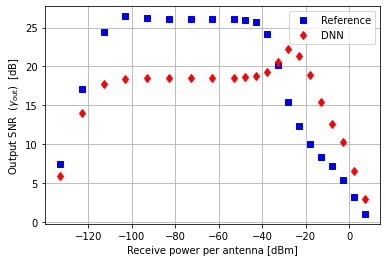

12


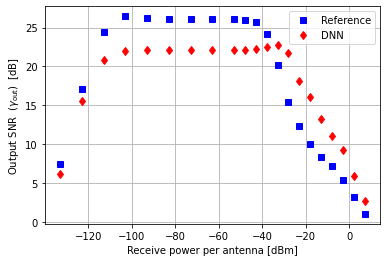

11


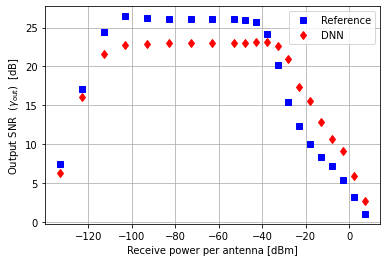

10


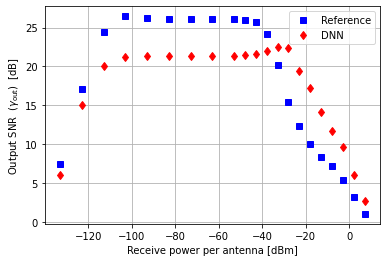

9


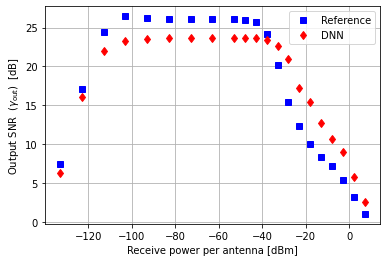

8


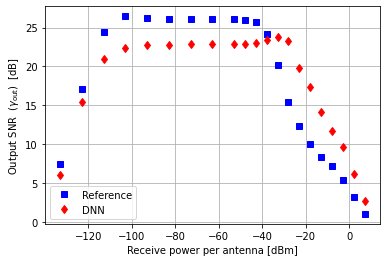

7


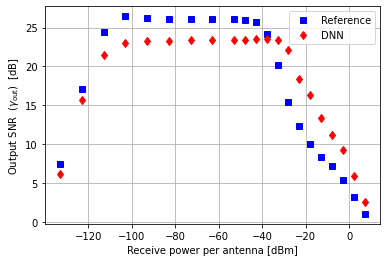

6


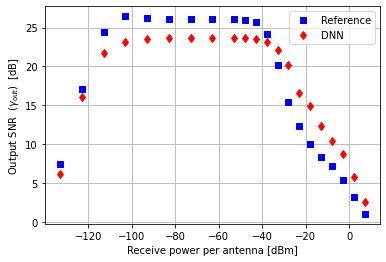

5


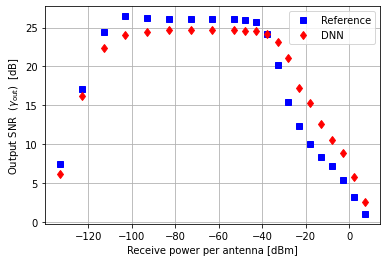

4


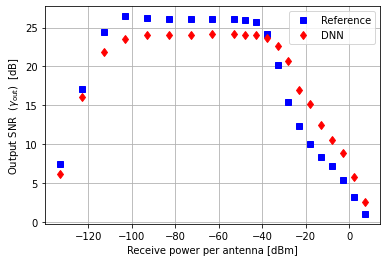

3


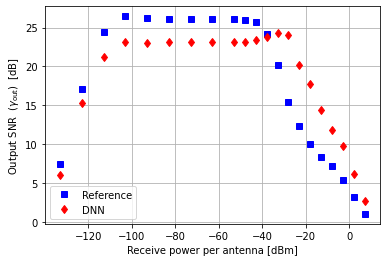

2


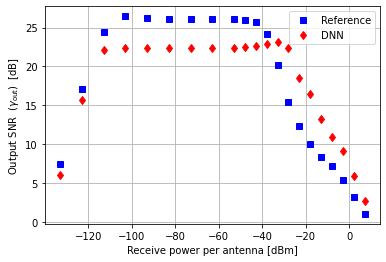

1


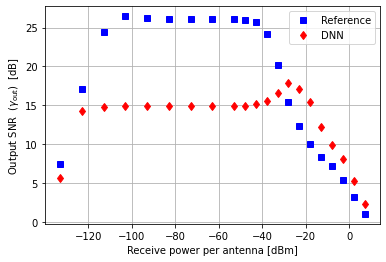

20


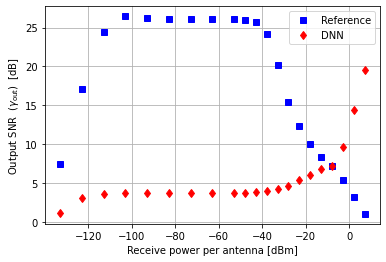

19


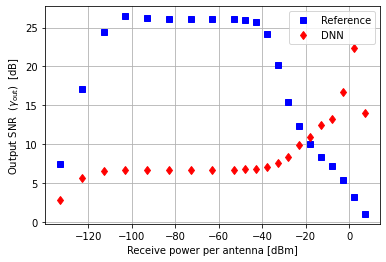

18


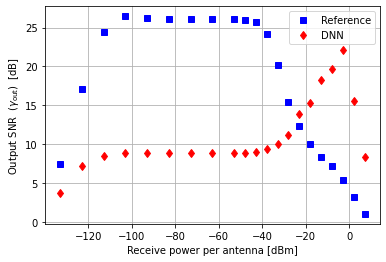

17


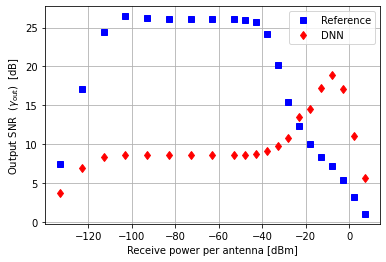

16


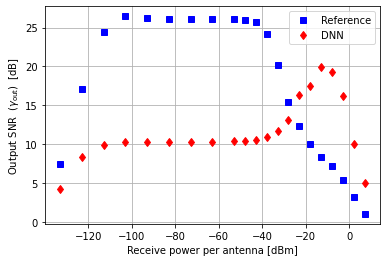

15


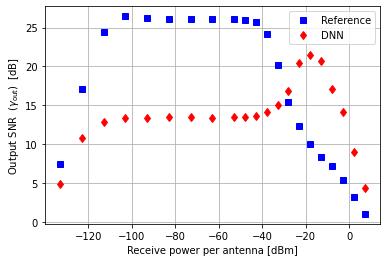

14


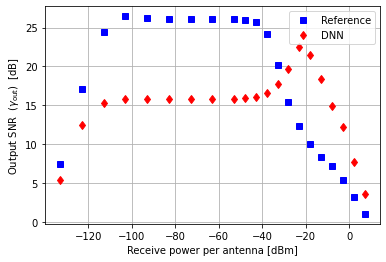

13


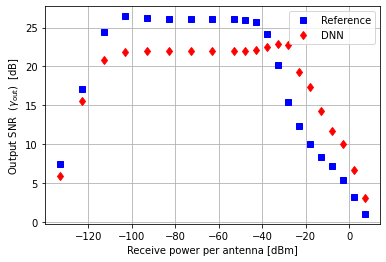

12


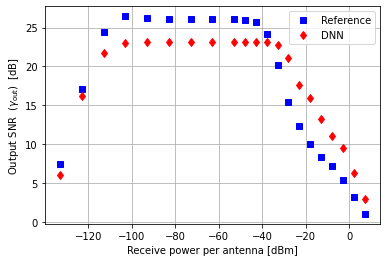

11


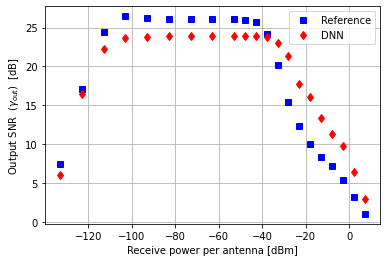

10


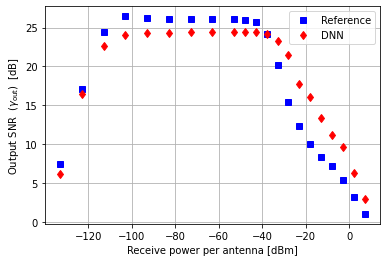

9


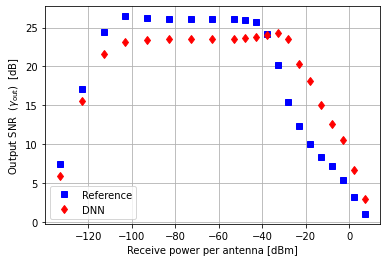

8


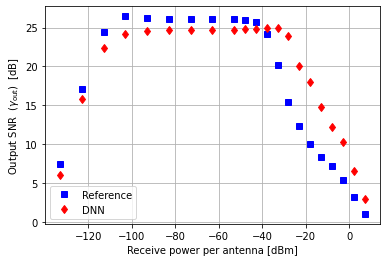

7


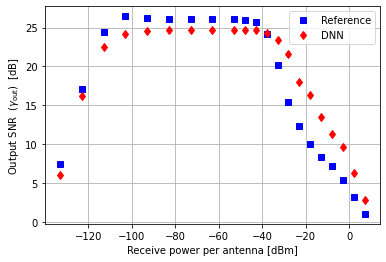

6


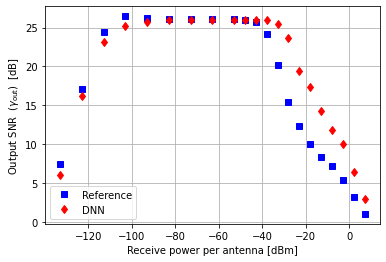

5


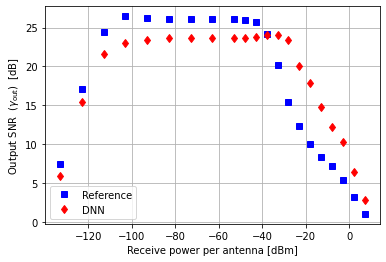

4


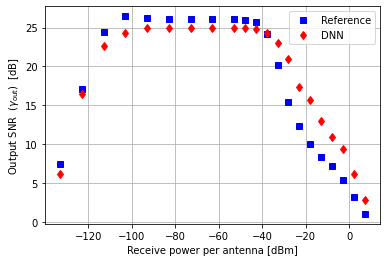

3


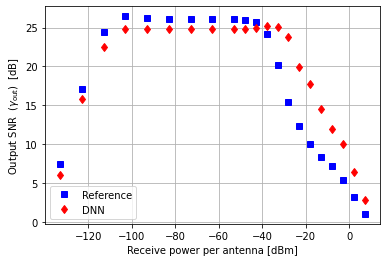

2


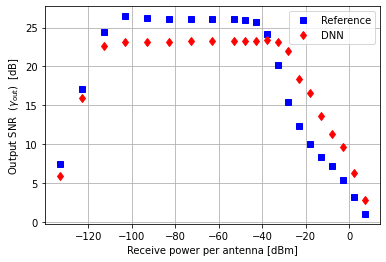

1


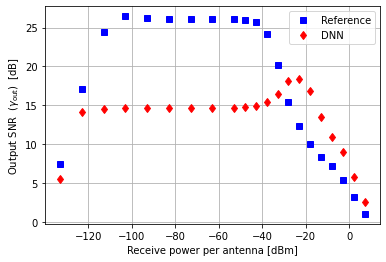

20


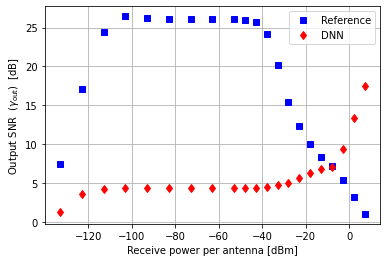

19


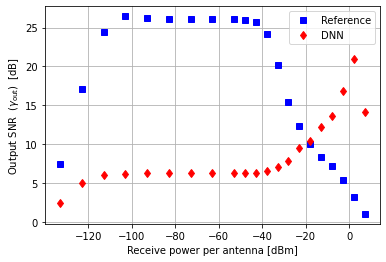

18


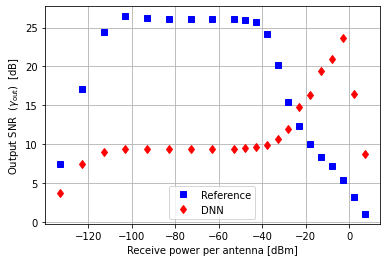

17


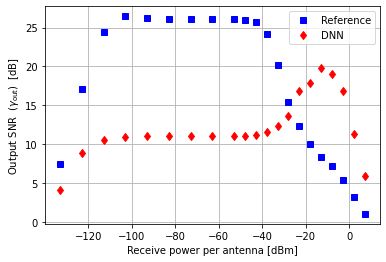

16


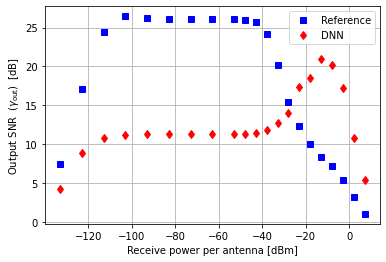

15


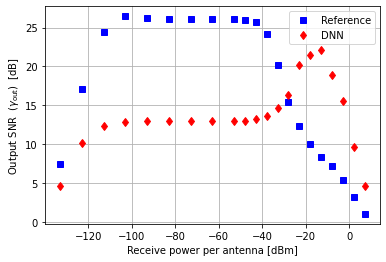

14


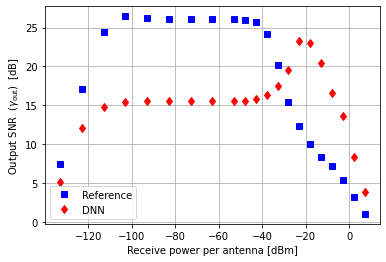

13


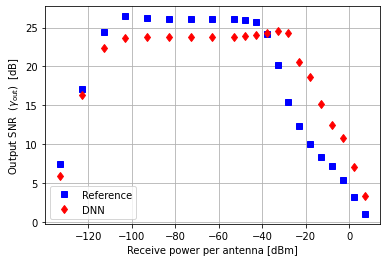

12


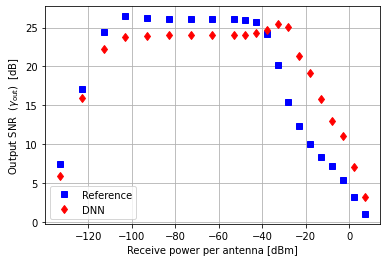

11


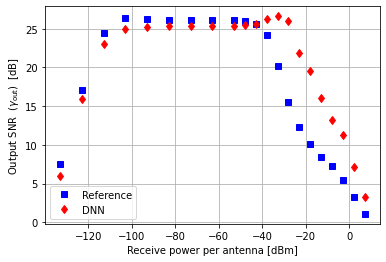

10


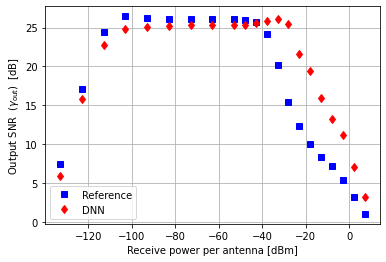

9


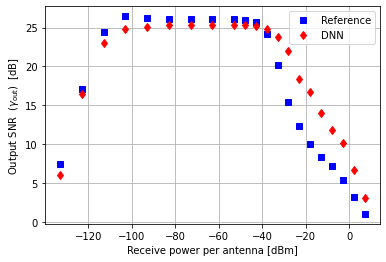

8


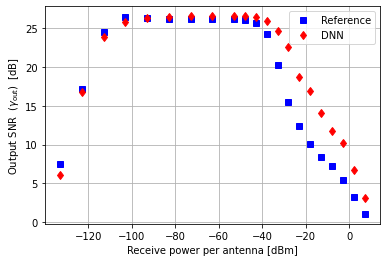

7


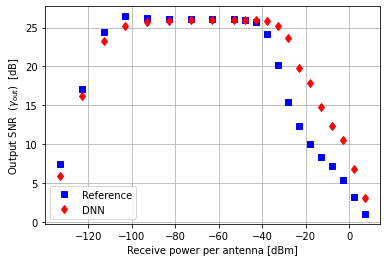

6


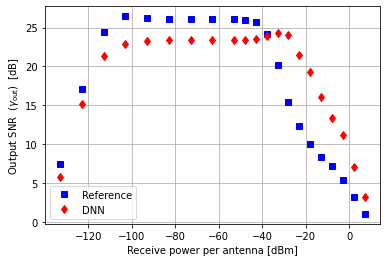

5


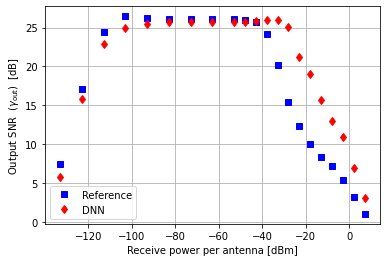

4


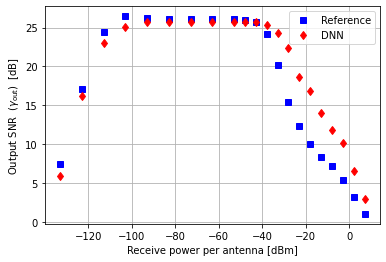

3


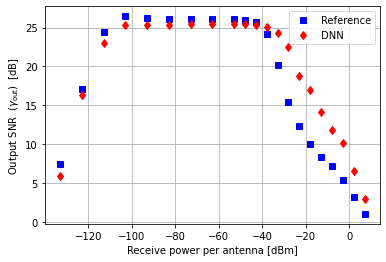

2


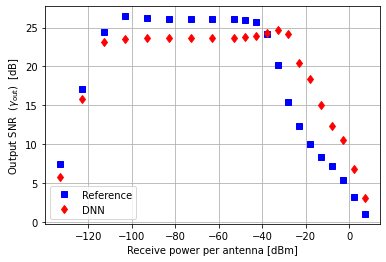

1


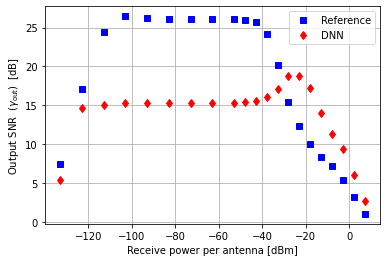

20


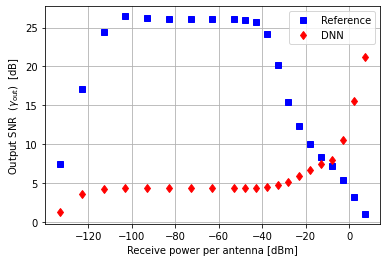

19


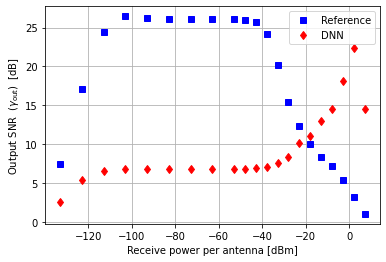

18


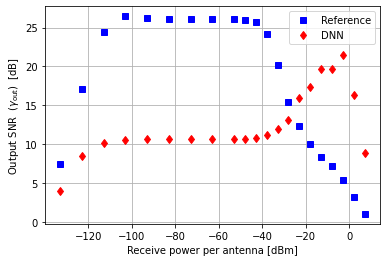

17


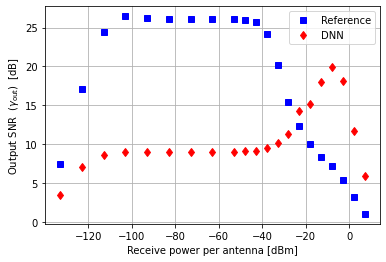

16


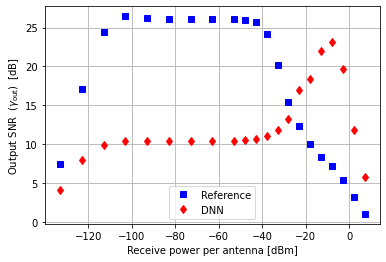

15


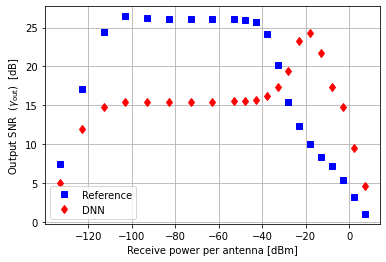

14


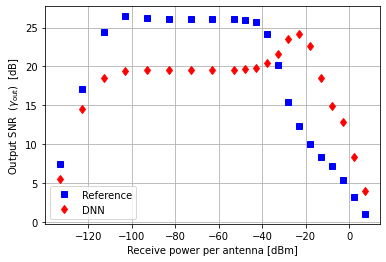

13


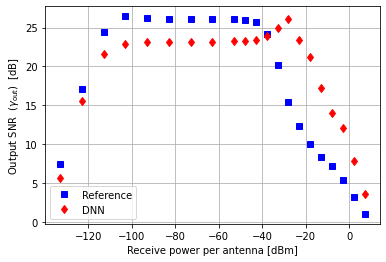

12


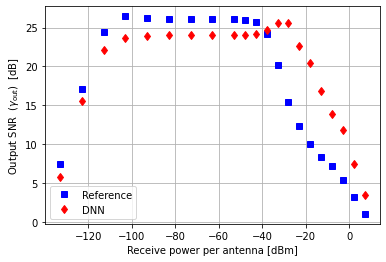

11


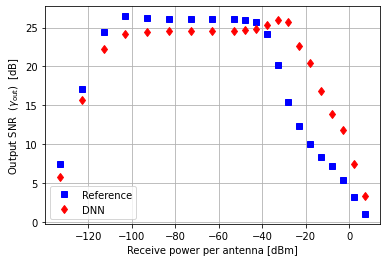

10


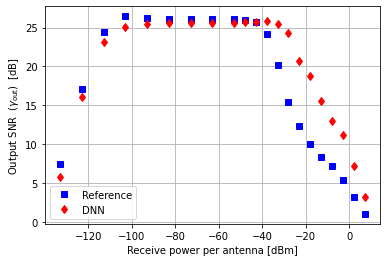

9


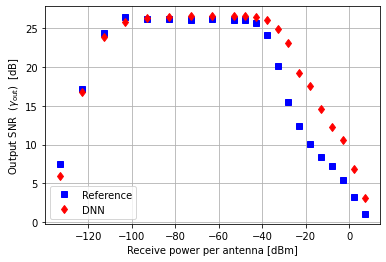

8


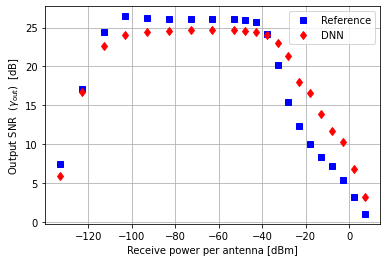

7


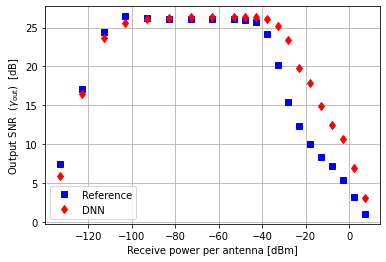

6


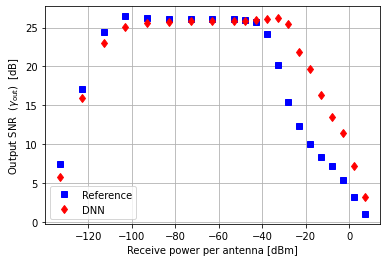

5


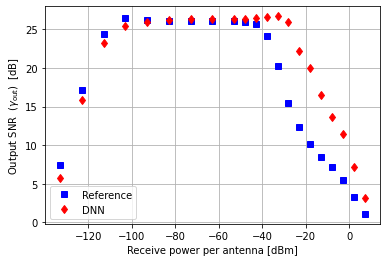

4


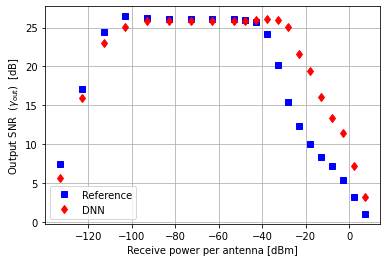

3


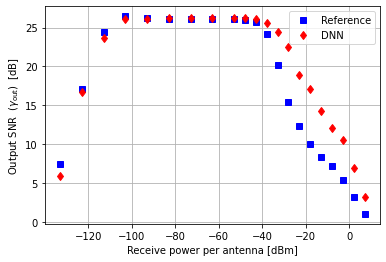

2


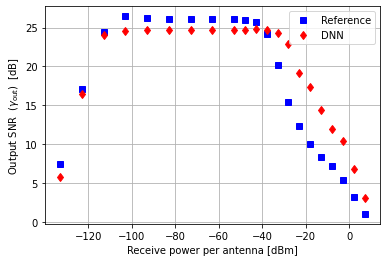

1


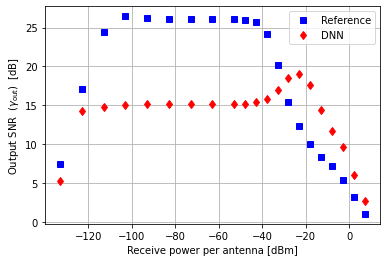

20


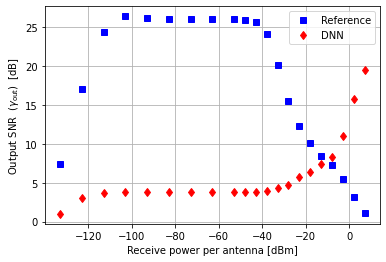

19


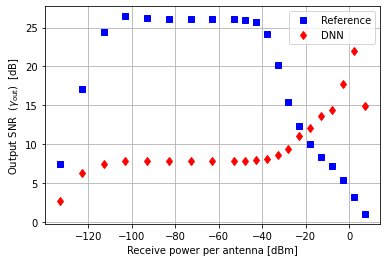

18


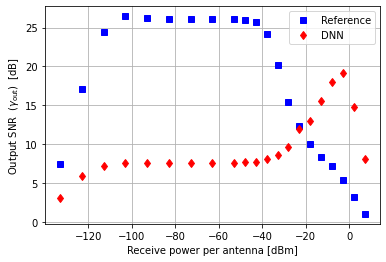

17


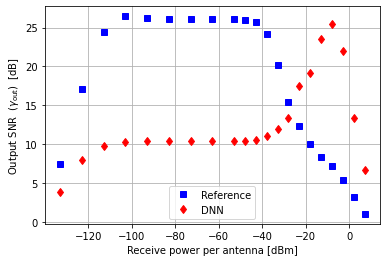

16


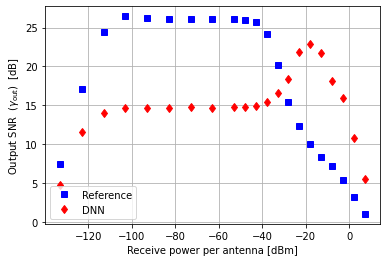

15


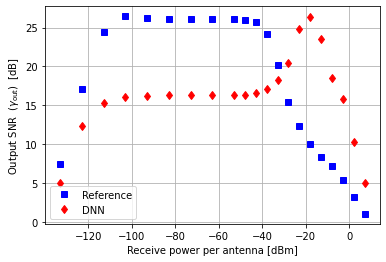

14


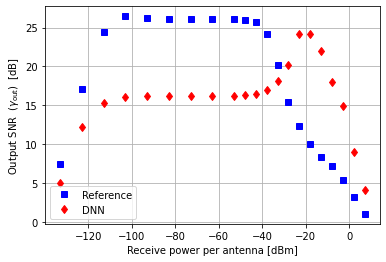

13


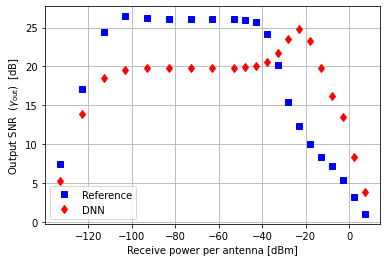

12


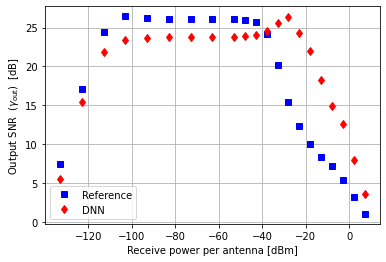

11


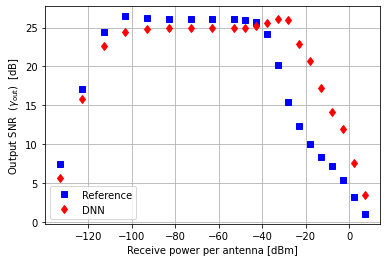

10


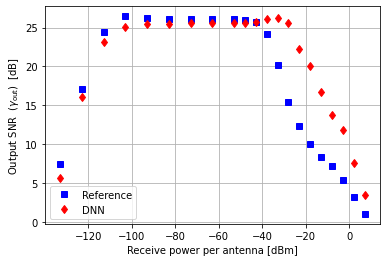

9


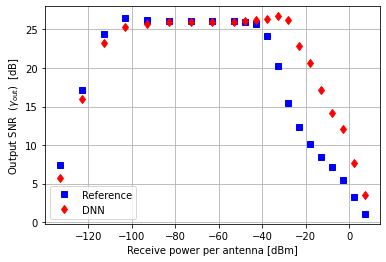

8


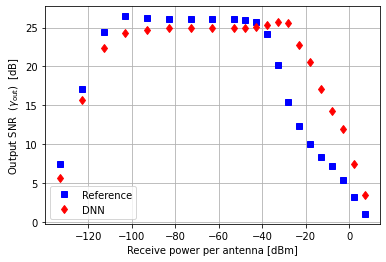

7


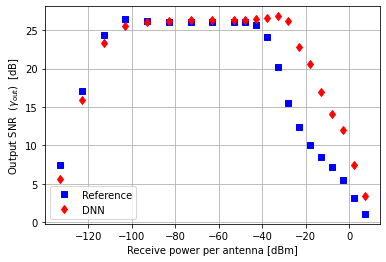

6


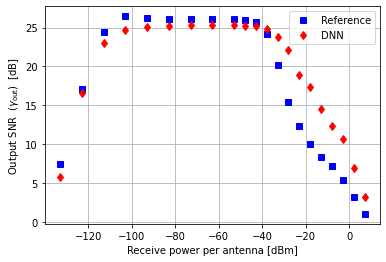

5


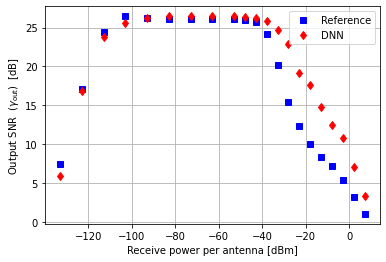

4


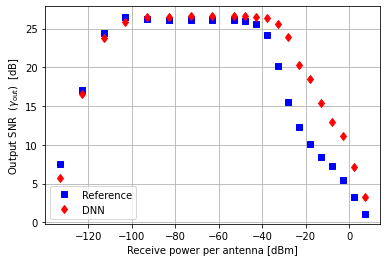

3


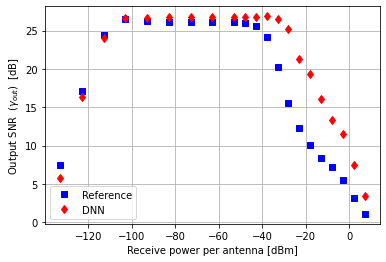

2


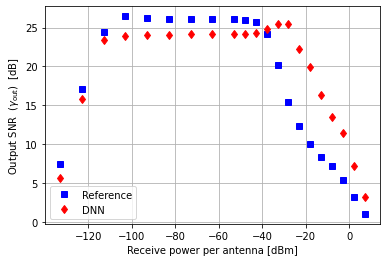

1


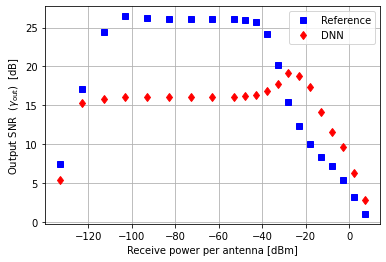

20


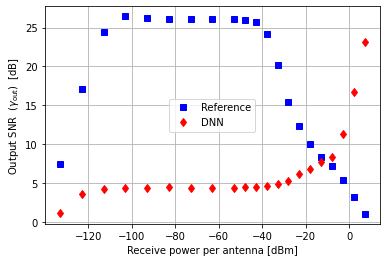

19


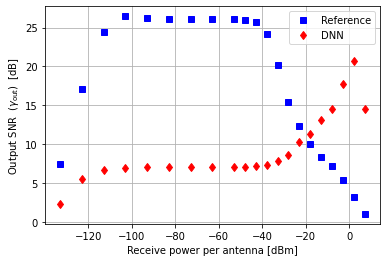

18


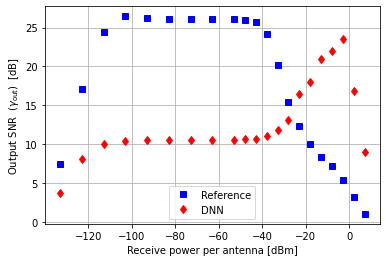

17


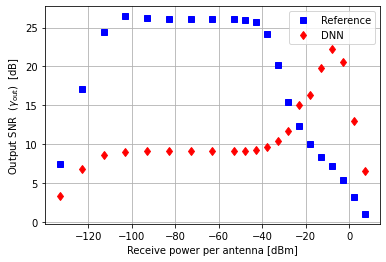

16


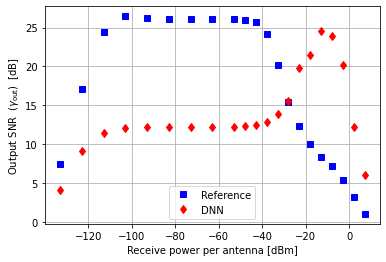

15


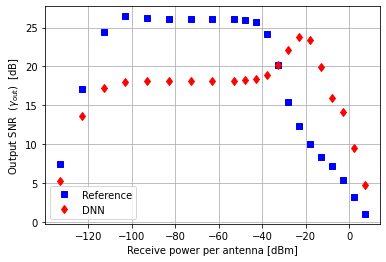

14


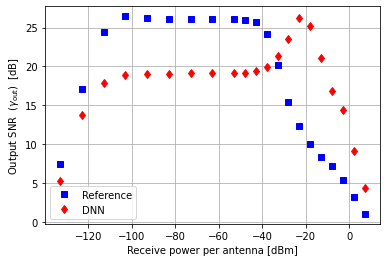

13


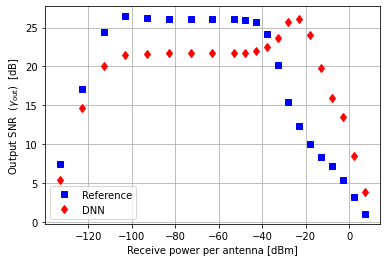

12


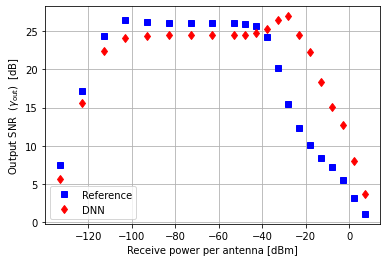

11


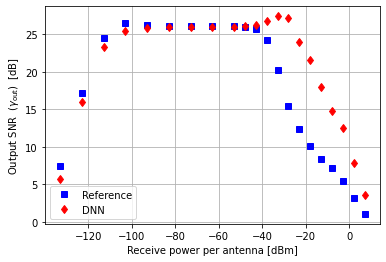

10


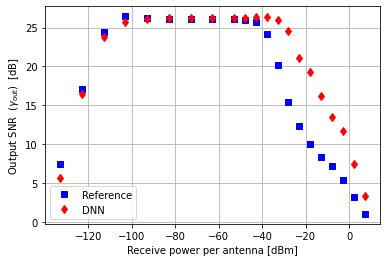

9


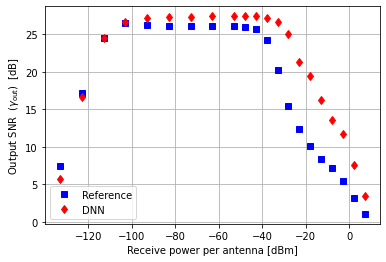

8


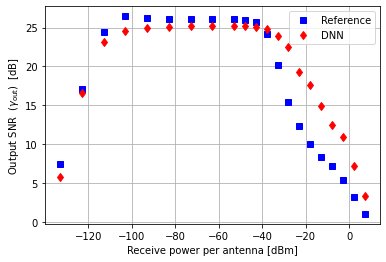

7


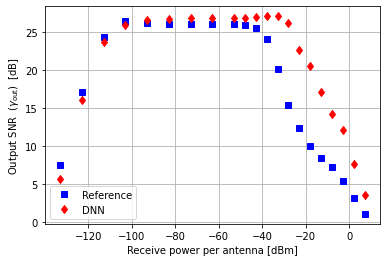

6


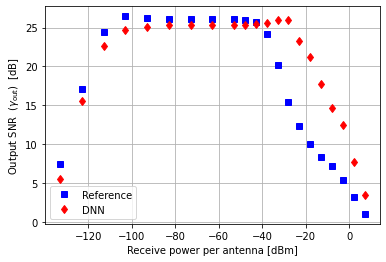

5


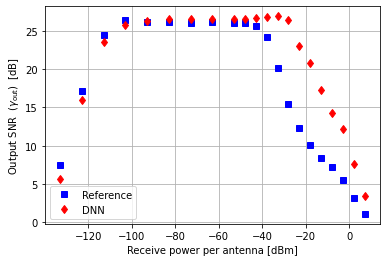

4


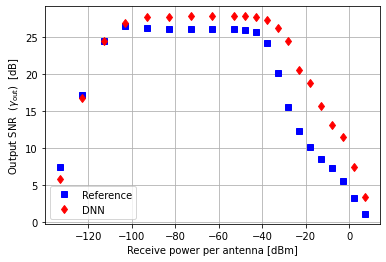

3


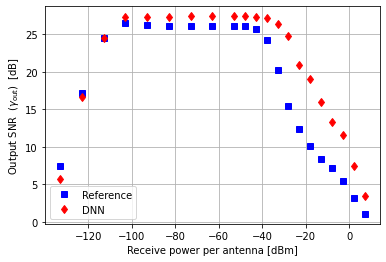

2


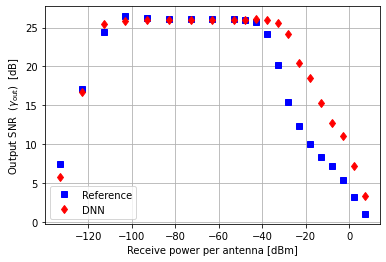

1


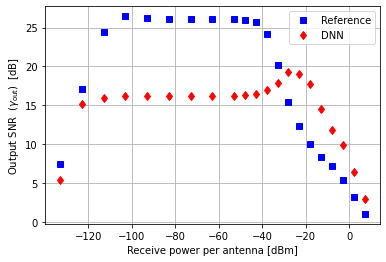

20


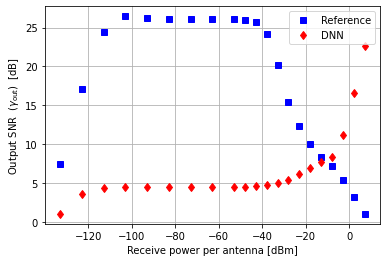

19


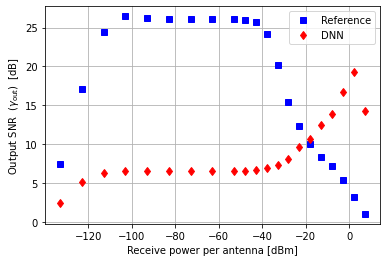

18


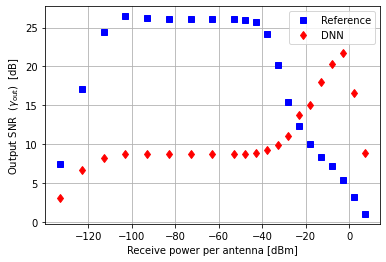

17


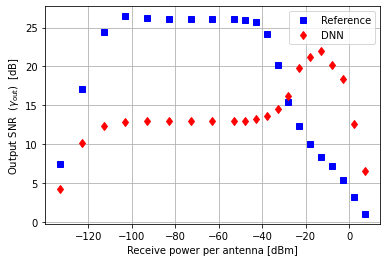

16


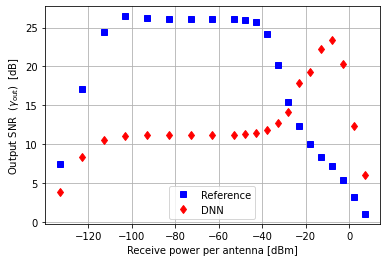

15


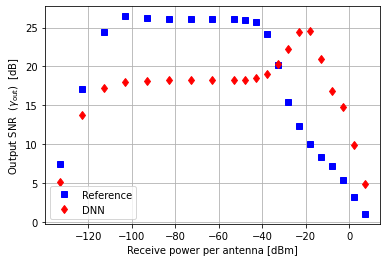

14


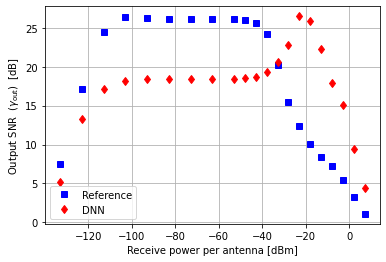

13


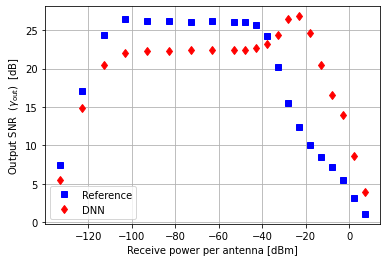

12


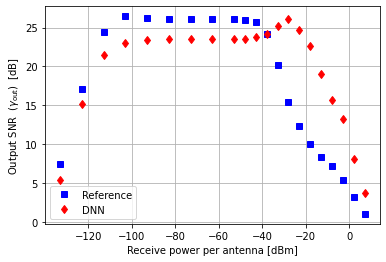

11


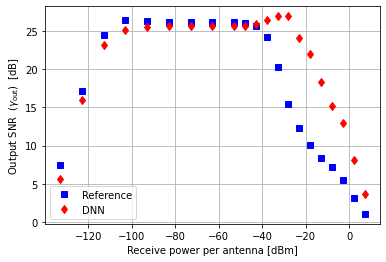

10


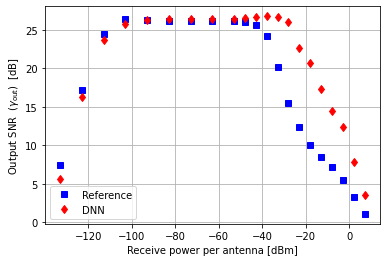

9


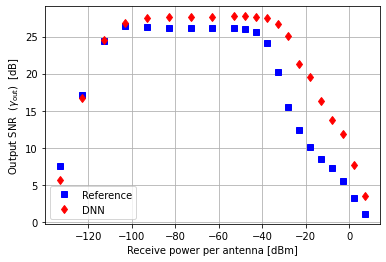

8


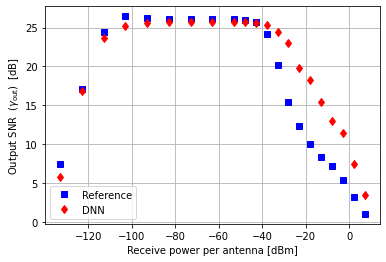

7


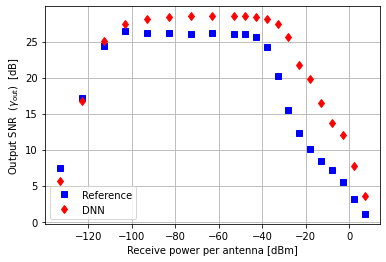

6


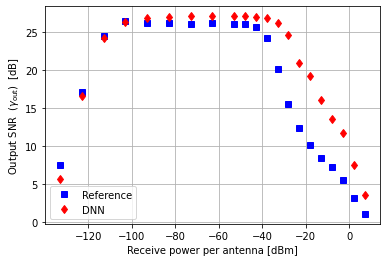

5


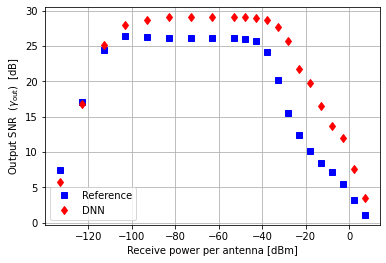

4


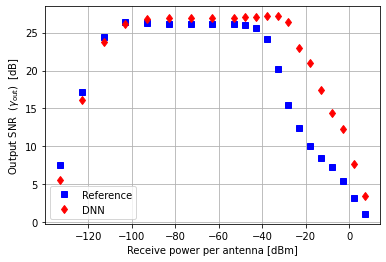

3


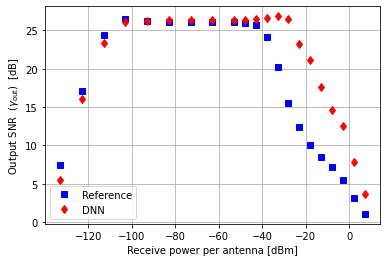

2


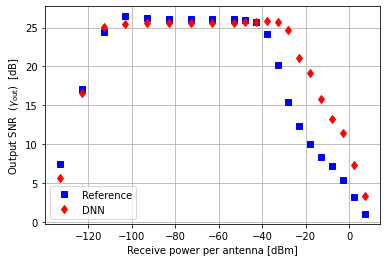

1


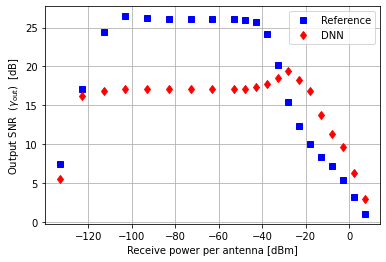

20


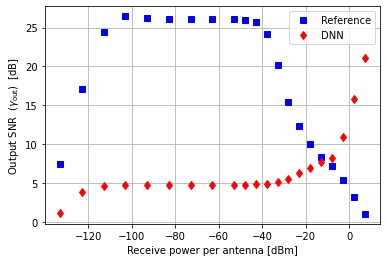

19


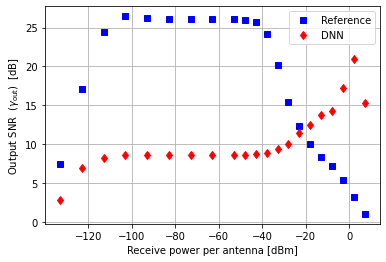

18


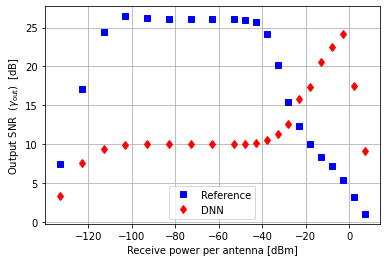

17


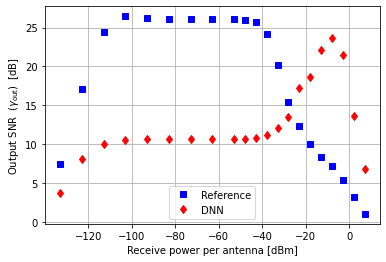

16


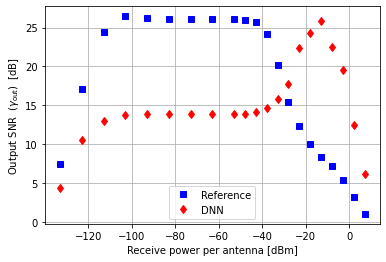

15


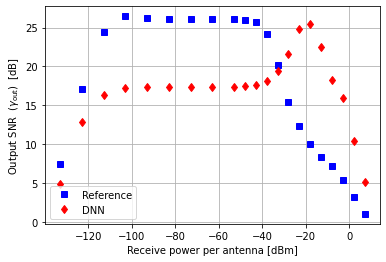

14


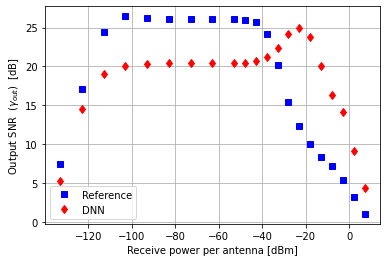

13


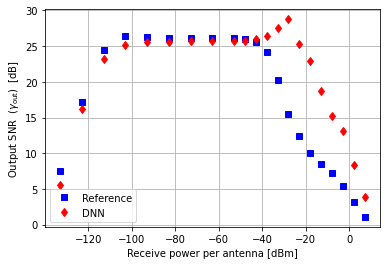

12


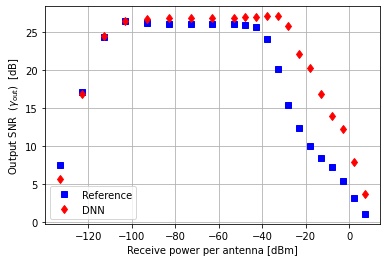

11


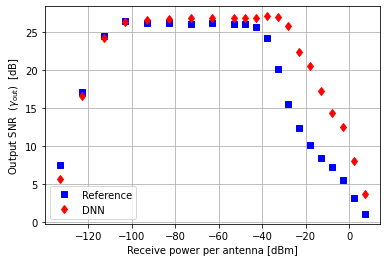

10


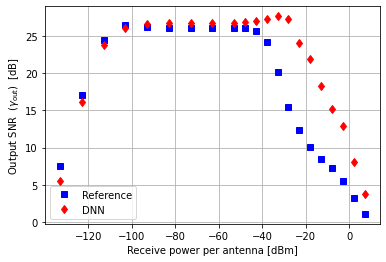

9


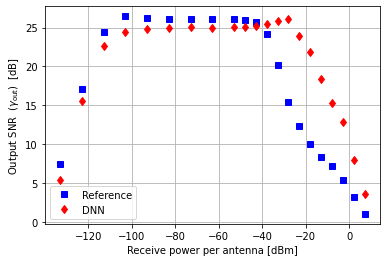

8


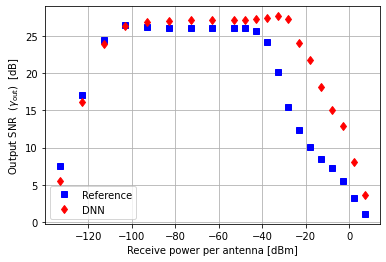

7


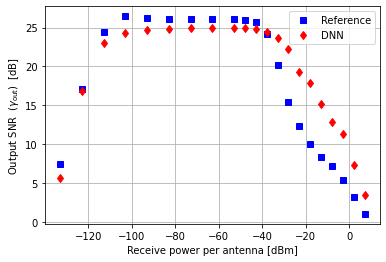

6


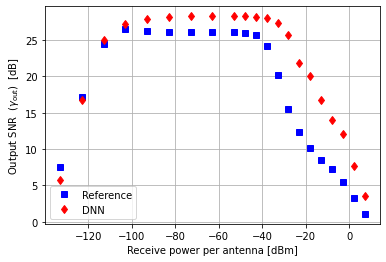

5


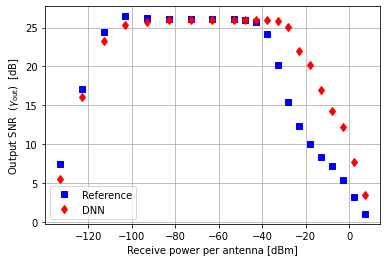

4


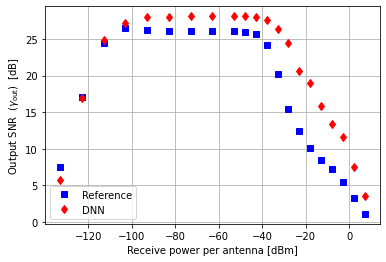

3


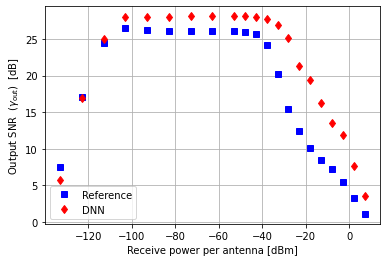

2


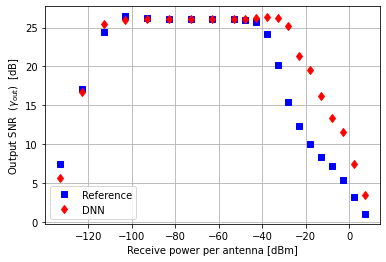

1


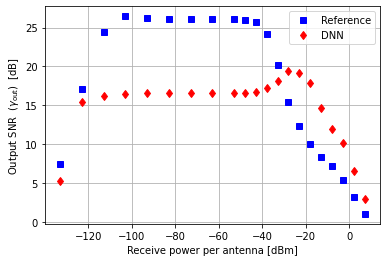

In [5]:
fc_activation = 'softsign'
fc_kernel_initializer = 'lecun_uniform'
fc_kernel_regularizer = None
fc_bias_initializer = 'lecun_uniform'
fc_bias_regularizer = None
fc_use_bias = True

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32,
                          activation=fc_activation,
                          use_bias=fc_use_bias,
                          kernel_initializer=fc_kernel_initializer,
                          kernel_regularizer=fc_kernel_regularizer,
                          bias_regularizer=fc_bias_regularizer,
                          bias_initializer=fc_bias_initializer),
    # tf.keras.layers.LeakyReLU(0.3),
    # tf.keras.layers.Dropout(0.1),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64,
                          activation=fc_activation,
                          use_bias=fc_use_bias,
                          kernel_initializer=fc_kernel_initializer,
                          kernel_regularizer=fc_kernel_regularizer,
                          bias_regularizer=fc_bias_regularizer,
                          bias_initializer=fc_bias_initializer),
    # tf.keras.layers.LeakyReLU(0.3),
    # tf.keras.layers.Dropout(0.1),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128,
                          activation=fc_activation,
                          use_bias=fc_use_bias,
                          kernel_initializer=fc_kernel_initializer,
                          kernel_regularizer=fc_kernel_regularizer,
                          bias_regularizer=fc_bias_regularizer,
                          bias_initializer=fc_bias_initializer),
    # tf.keras.layers.LeakyReLU(0.3),
    # tf.keras.layers.Dropout(0.1),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256,
                          activation=fc_activation,
                          use_bias=fc_use_bias,
                          kernel_initializer=fc_kernel_initializer,
                          kernel_regularizer=fc_kernel_regularizer,
                          bias_regularizer=fc_bias_regularizer,
                          bias_initializer=fc_bias_initializer),
    tf.keras.layers.Dense(512,
                          activation=fc_activation,
                          use_bias=fc_use_bias,
                          kernel_initializer=fc_kernel_initializer,
                          kernel_regularizer=fc_kernel_regularizer,
                          bias_regularizer=fc_bias_regularizer,
                          bias_initializer=fc_bias_initializer),
    tf.keras.layers.Dense(1024,
                          activation=fc_activation,
                          use_bias=fc_use_bias,
                          kernel_initializer=fc_kernel_initializer,
                          kernel_regularizer=fc_kernel_regularizer,
                          bias_regularizer=fc_bias_regularizer,
                          bias_initializer=fc_bias_initializer),
    tf.keras.layers.Dense(512,
                          activation=fc_activation,
                          use_bias=fc_use_bias,
                          kernel_initializer=fc_kernel_initializer,
                          kernel_regularizer=fc_kernel_regularizer,
                          bias_regularizer=fc_bias_regularizer,
                          bias_initializer=fc_bias_initializer),
    tf.keras.layers.Dense(256,
                          activation=fc_activation,
                          use_bias=fc_use_bias,
                          kernel_initializer=fc_kernel_initializer,
                          kernel_regularizer=fc_kernel_regularizer,
                          bias_regularizer=fc_bias_regularizer,
                          bias_initializer=fc_bias_initializer),
    # tf.keras.layers.LeakyReLU(0.3),
    # tf.keras.layers.Dropout(0.1),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128,
                          activation=fc_activation,
                          use_bias=fc_use_bias,
                          kernel_initializer=fc_kernel_initializer,
                          kernel_regularizer=fc_kernel_regularizer,
                          bias_regularizer=fc_bias_regularizer,
                          bias_initializer=fc_bias_initializer),
    # tf.keras.layers.LeakyReLU(0.3),
    # tf.keras.layers.Dropout(0.1),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64,
                          activation=fc_activation,
                          use_bias=fc_use_bias,
                          kernel_initializer=fc_kernel_initializer,
                          kernel_regularizer=fc_kernel_regularizer,
                          bias_regularizer=fc_bias_regularizer,
                          bias_initializer=fc_bias_initializer),
    # tf.keras.layers.LeakyReLU(0.3),
    # tf.keras.layers.Dropout(0.1),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='linear')
])

sgd_opt = tf.keras.optimizers.SGD(
    learning_rate=1e-4,
    #momentum=0.9,
    #nesterov=False
)
adam_opt = tf.keras.optimizers.Adam(
    learning_rate=1e-3,
    amsgrad=False,
    epsilon=1e-7
)
adamax_opt = tf.keras.optimizers.Adamax(
    learning_rate=1e-3,
)
model.compile(
    optimizer=adam_opt,
    loss=losses.MeanSquaredError(),
)
def my_norm(A):
    A_min = np.min(A)
    A_max = np.max(A)
    A -= A_min
    A /= (A_max-A_min)
    return A

Pin = np.array((-132.9103, -122.9103, -112.9103, -102.9103, -92.9103,
       -82.9103, -72.9103, -62.9103, -52.9103, -47.9103, -42.9103,
       -37.9103, -32.9103, -27.9103, -22.9103, -17.9103, -12.9103,
       -7.9103, -2.9103, 2.0897, 7.0897))

def test():
    pred_snr = np.zeros(nsnr)
    base_snr = np.zeros(nsnr)

    for isnr in range(nsnr):
        X = np.hstack((y_rffe[:,isnr,:].real,y_rffe[:,isnr,:].imag))

        X_min = np.min(X)
        X_max = np.max(X)
        X -= X_min
        X /= (X_max-X_min)
        X = np.hstack((X,10**(0.1*(pwr_out[:,isnr,:]-30))))

        pred = model(X).numpy()

        pred *= (X_max-X_min)
        pred += X_min

        pred = pred[:,:16] + 1j*pred[:,16:]
        pred_snr[isnr] = snr(pred)
        base_snr[isnr] = snr(y_rffe[:,isnr,:])

    plt.plot(Pin, base_snr, 'bs')
    plt.plot(Pin, pred_snr, 'rd')
    plt.grid()
    plt.xlabel('Receive power per antenna [dBm]')
    plt.ylabel('Output SNR $\;(\gamma_\mathrm{out})\;$ [dB]')
    plt.legend(['Reference', 'DNN'])
    plt.show()

# for isnr in range(nsnr):
for it in range(10):
    for isnr in range(nsnr-1,0,-1):
        print(isnr)

        r = np.hstack((y_ant[:,isnr,:].real,y_ant[:,isnr,:].imag))
        X = np.hstack((y_rffe[:,isnr,:].real,y_rffe[:,isnr,:].imag))
        r = my_norm(r)
        X = my_norm(X)
        X = np.hstack((X,10**(0.1*(pwr_out[:,isnr,:]-30))))

        x_train, x_test, y_train, y_test = train_test_split(X, r, shuffle=True, test_size=0.1)

        model.fit(x_train, y_train,
                  epochs=10,
                  batch_size=64,
                  shuffle=False,
                  validation_data=(x_test, y_test),
                  verbose=False)
        test()